In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV as gridsearchcv
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, auc, roc_curve

from sklearn.neural_network import MLPClassifier as mlp
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import AdaBoostClassifier as ada
from sklearn.svm import SVC as svc

from scipy import stats

import math
import os
import random

In [4]:
## Move to correct folder for server.  Can remove before sending
# os.chdir('/home/poblivsig/Dropbox/Cancer_and_Phishing')
os.chdir('/home/poblivsig/Dropbox/cancer_and_phishing')
print(os.getcwd())

/home/poblivsig/Dropbox/cancer_and_phishing


In [5]:
# Open the pre-processed csv
# Set the index to get rid of 'unnamed: 32' column
df = pd.read_csv('data/breast_cancer.csv', index_col=[32])

In [6]:
## Get info about breast cancer dataset
print(f'Shape\n{df.shape}')
print(f'Columns\n{df.columns}')
print(f'dtypes\n{df.dtypes}')
pd.set_option('display.max_columns', None)
print(f'Description\n{df.describe()}')
print(f'Info:\n{df.info}')
print(f'Check out the sample: {df.sample(n=1)}')
pd.set_option('display.max_columns', 5)

Shape
(569, 32)
Columns
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
dtypes
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
conc

/home/poblivsig/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


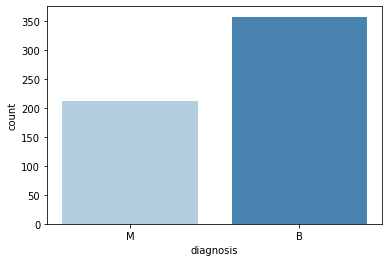

In [7]:
## Count the different diagnosis values
sns.countplot(df['diagnosis'],
              palette='Blues',
              label="Diagnoses Count", )
plt.plot()
plt.savefig('data/charts/bc_diag_countplot.png')

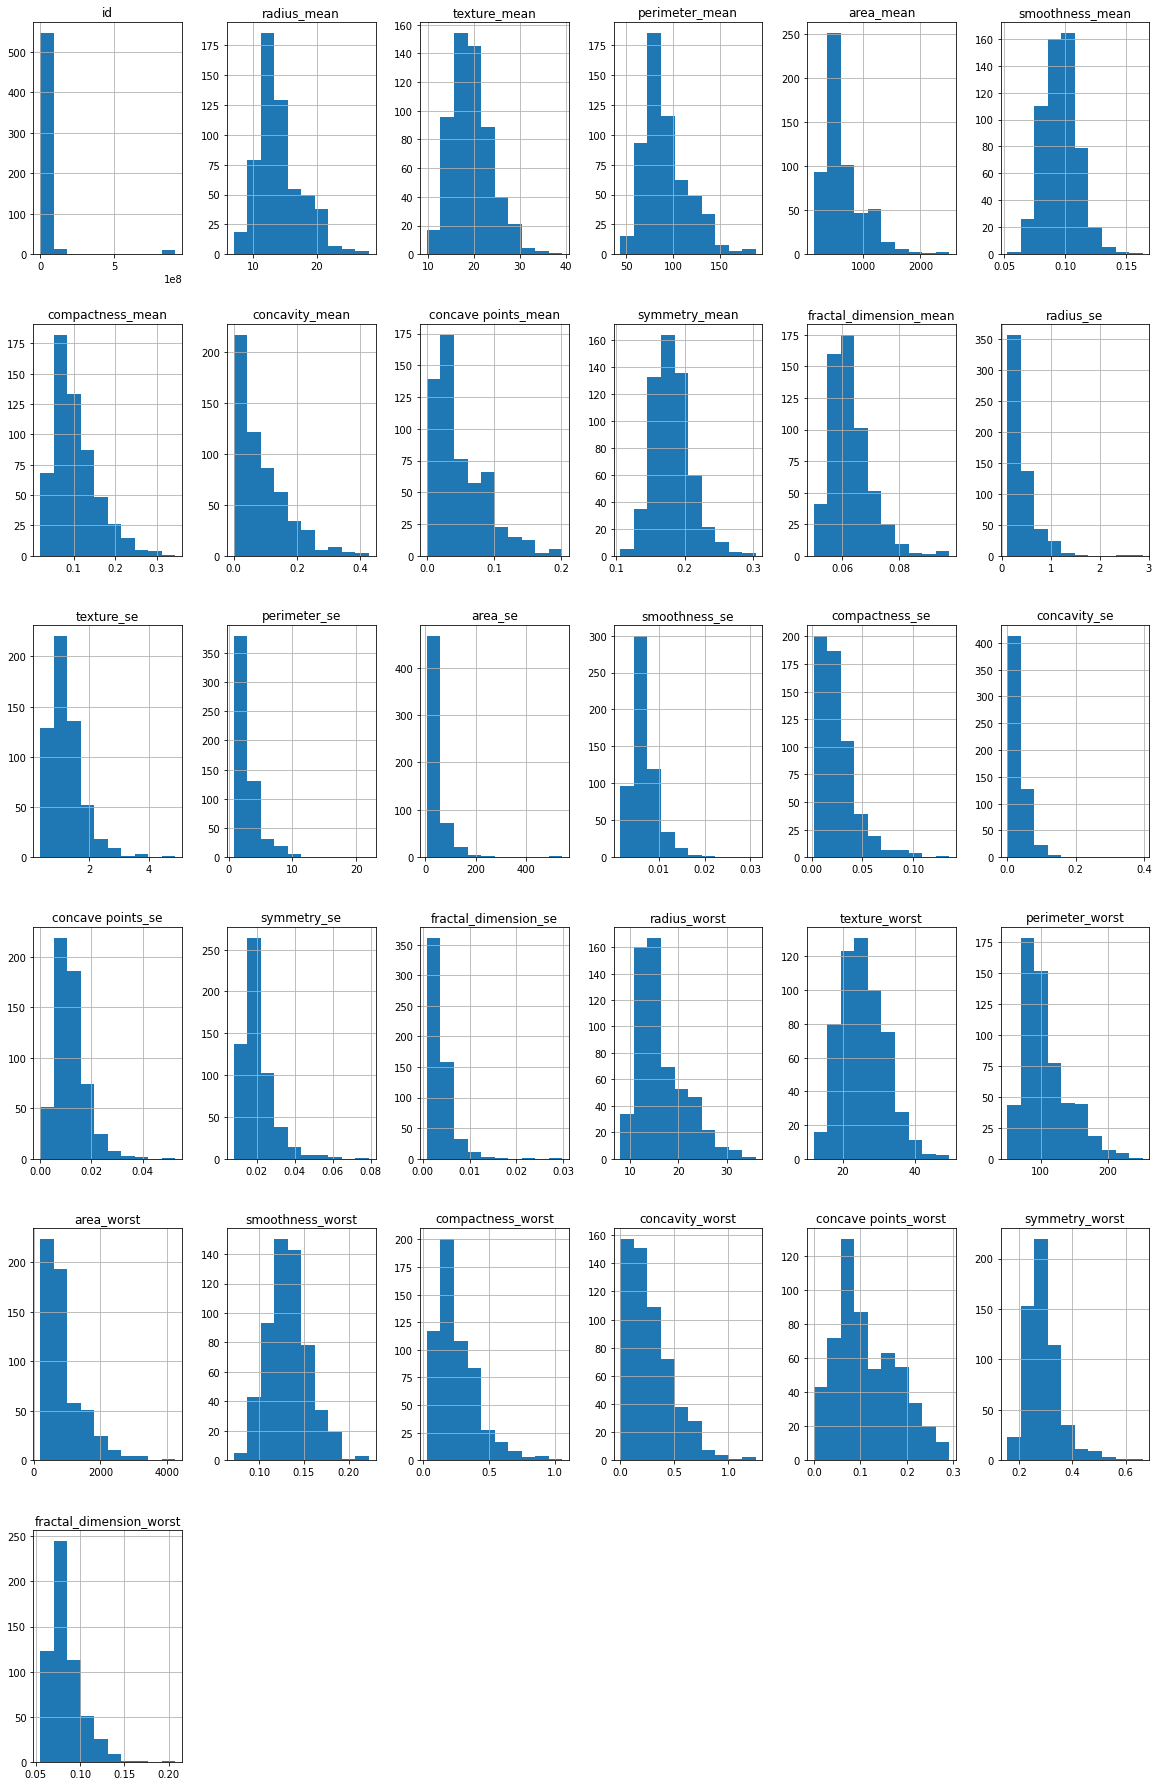

<Figure size 432x288 with 0 Axes>

In [8]:
# Create mini-histograms for each attribute

# First remove attributes that can't be charted
# df_density = df.__deepcopy__()
# df_density.drop('Unnamed: 32')
df.hist(bins=10,
        figsize=(20, 32))
plt.show()

# Build density plots
# df_density.plot(kind='density',
#                 subplots=True,
#                 sharex=False,
#                 layout=(8,5))
# plt.show()
plt.savefig('data/charts/bc_histogram_plots.png')


[]

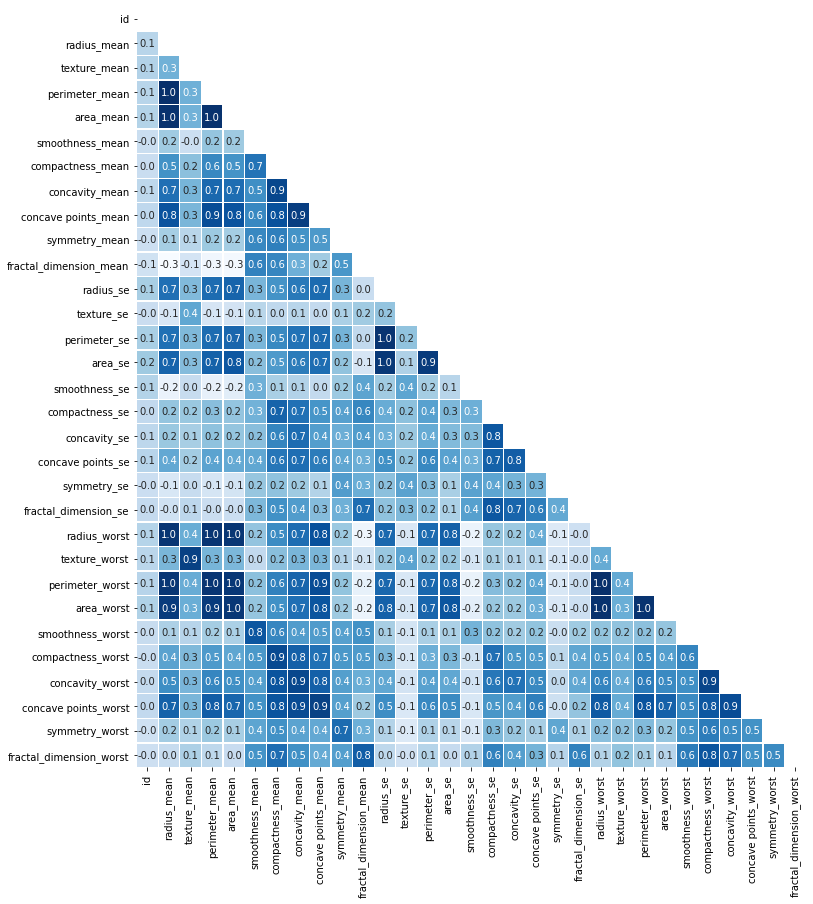

In [9]:
# Build a heatmap to find the attributes that correlate the most
f, ax = plt.subplots(figsize=(12, 14))
conf_matrix = np.triu(df.corr())
sns.heatmap(df.corr(),
            annot=True,
            cbar=0,
            linewidths=.3,
            fmt='.1f',
            mask=conf_matrix,
            cmap='Blues',
            ax=ax)
plt.plot()

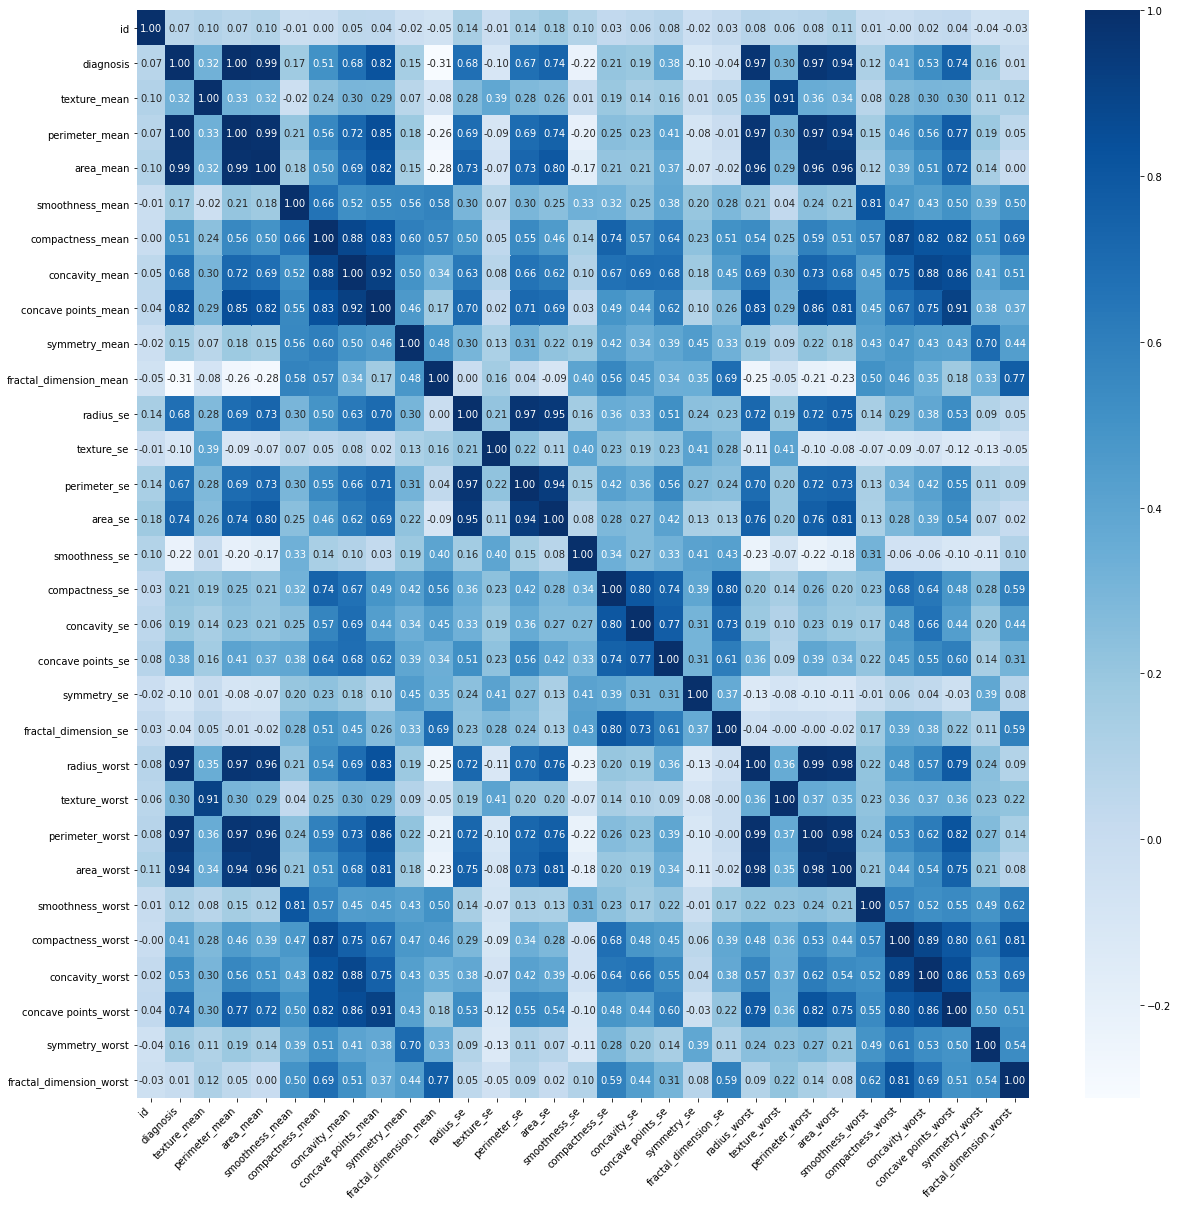

In [10]:
corrs = df.corr()
col_names = ['id',
             'diagnosis',
             'texture_mean',
             'perimeter_mean',
             'area_mean',
             'smoothness_mean',
             'compactness_mean',
             'concavity_mean',
             'concave points_mean',
             'symmetry_mean',
             'fractal_dimension_mean',
             'radius_se',
             'texture_se',
             'perimeter_se',
             'area_se',
             'smoothness_se',
             'compactness_se',
             'concavity_se',
             'concave points_se',
             'symmetry_se',
             'fractal_dimension_se',
             'radius_worst',
             'texture_worst',
             'perimeter_worst',
             'area_worst',
             'smoothness_worst',
             'compactness_worst',
             'concavity_worst',
             'concave points_worst',
             'symmetry_worst',
             'fractal_dimension_worst']


fig, ax = plt.subplots(figsize=(20, 20))

# Create color map
colormap = sns.diverging_palette(220,
                                 10,
                                 as_cmap=True)

# Create Heat Map, including annotations
# Put the floating point numbers in the map
sns.heatmap(corrs,
            cmap='Blues',
            fmt=".2f",
            annot=True)

ax.set_xticklabels(
    col_names,
    horizontalalignment='right',
    rotation=45)

ax.set_yticklabels(col_names)
plt.show()

In [11]:
# Find the amount of correlation between each column and the diagnosis
print('Amount of correlation (Pearsons r) for each column:')
for (col_name, _) in df.iteritems():
    print(f"{col_name}: {df[col_name].corr(df['diagnosis'], method='pearson'):.2f}")

Amount of correlation (Pearsons r) for each column:


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [25]:
# Convert the diagnosis column to integer so it can be correlated against the other columns
df['diagnosis'] = (df['diagnosis'] !='M').astype(int)

In [ ]:
# Find the amount of correlation between each column and the diagnosis
corrs = df.corr()
corr_quality = corrs['diagnosis']
print('Amount of correlation (Pearsons r) for each column:')
print(corr_quality.sort_values(ascending=False))

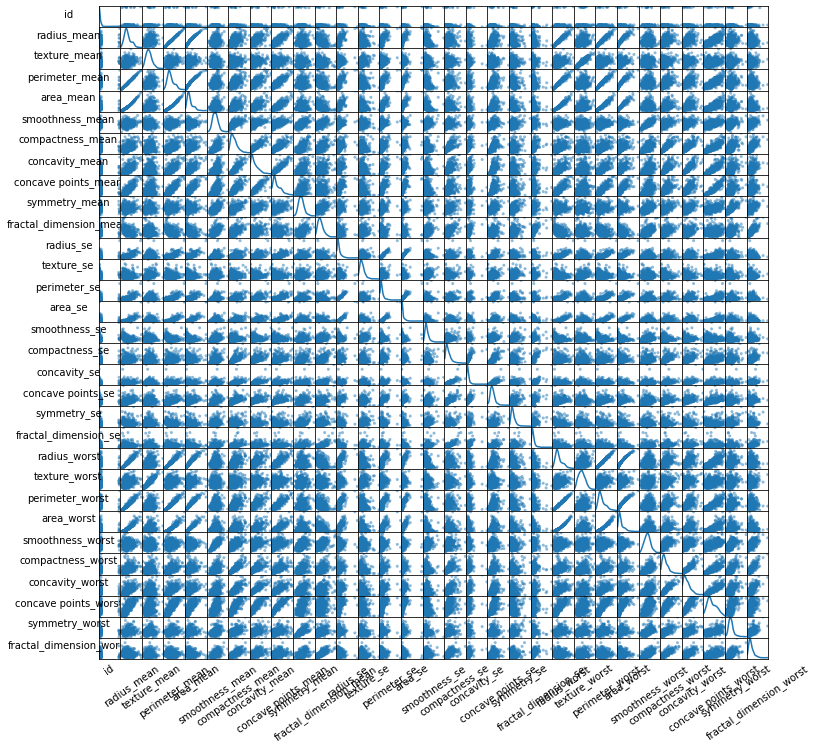

In [12]:
# Create a scatterplot matrix with a Kernel Density estimation on the diagonal
scatter_matrix = pd.plotting.scatter_matrix(df, diagonal='kde', cmap='Blues', figsize=(12, 12))

#May need to offset label when rotating to prevent overlap of figure
[scat.get_yaxis().set_label_coords(-1.4, 0.4) for scat in scatter_matrix.reshape(-1)]

# Rotate all of the column names
[scat.xaxis.label.set_rotation(35) for scat in scatter_matrix.reshape(-1)]
[scat.yaxis.label.set_rotation(0) for scat in scatter_matrix.reshape(-1)]

# Remove all of the markings and numbers along the axes
[scat.set_xticks(()) for scat in scatter_matrix.reshape(-1)]
[scat.set_yticks(()) for scat in scatter_matrix.reshape(-1)]

plt.show()


[]

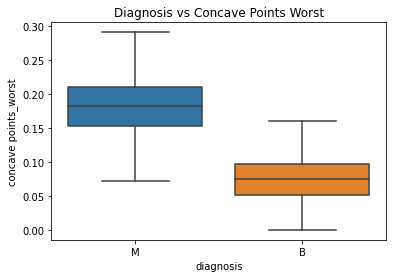

In [13]:
###############################
# Build boxplots for the most correlated against the diagnosis (3)

## Concave Points Worst
plot = sns.boxplot(x='diagnosis',
                   y='concave points_worst',
                   data=df,
                   showfliers=False)
plot.set_title('Diagnosis vs Concave Points Worst')
plt.plot()

[]

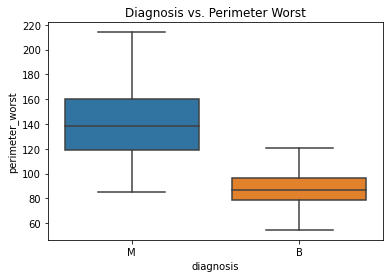

In [14]:
## Perimeter Worst
plot = sns.boxplot(x='diagnosis',
                   y='perimeter_worst',
                   data=df,
                   showfliers=False)
plot.set_title('Diagnosis vs. Perimeter Worst')
plt.plot()

[]

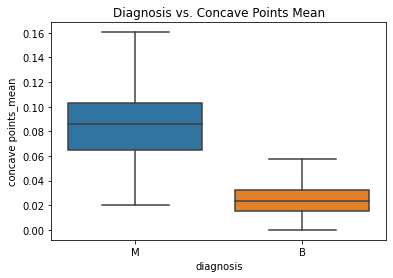

In [15]:
## Concave Points Mean
plot = sns.boxplot(x='diagnosis',
                   y='concave points_mean',
                   data=df,
                   showfliers=False)
plot.set_title('Diagnosis vs. Concave Points Mean')
plt.plot()


[]

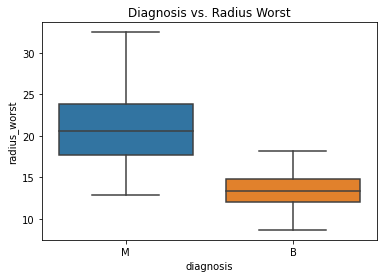

In [16]:
## Radius Worst
plot = sns.boxplot(x='diagnosis',
                   y='radius_worst',
                   data=df,
                   showfliers=False)
plot.set_title('Diagnosis vs. Radius Worst')
plt.plot()


[]

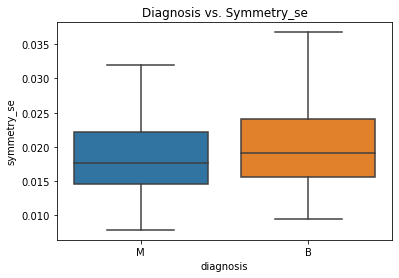

In [17]:
## Symmetry_se - the attribute that correlates the least
plot = sns.boxplot(x='diagnosis',
                   y='symmetry_se',
                   data=df,
                   showfliers=False)
plot.set_title('Diagnosis vs. Symmetry_se')
plt.plot()

In [18]:
## Split the data up.
y = df['diagnosis']
X = df.drop('diagnosis', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    stratify=y,
                                                    random_state=14)
print(df.shape)

(569, 32)


In [19]:
# Scale the features (attributes)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
def gridsearch(estimator, param_grid, cv, scoring_metric):
    clf = gridsearchcv(estimator=estimator,
                       param_grid=param_grid,
                       n_jobs=-1,
                       cv=cv,
                       return_train_score=True,
                       scoring=scoring_metric,
                       verbose=3)
    clf.fit(X_train, y_train)

    ### Output the results
    print(f'Best parameters: {clf.best_params_}')
    # print(f'Best score: {clf.best_score_}')
    # best_estimate = clf.best_estimator_
    # print(best_estimate)

    ## Now we have found the best parameters, use them...
    best_estimate.fit(X_train,y_train)

    predictor = best_estimate.predict(X_train)
    # mse = mean_squared_error(predictor, y_train)
    # r2 = r2_score(predictor, y_train)
    # print(f'Training Mean Square Error: {mse:.2f}')
    # print(f'Training R2: {r2:.2f}')

    y_predictor = best_estimate.predict(X_test)
    # mse = mean_squared_error(y_test, y_predictor)
    # r2 = r2_score(y_test, y_predictor)
    # print(f'Testing Mean Square Error: {mse:.2f}')
    # print(f'Testing R2: {r2:.2f}')
    # print('blah')

    return best_estimate, y_predictor


In [21]:
def cm_and_class_rep(X_test, y_test, y_predictor, best_estimate):
    confusion_matrix(y_test, y_predictor)
    cm = plot_confusion_matrix(best_estimate,
                               X_test,
                               y_test,
                               cmap=plt.cm.Blues,
                               normalize='true' )
    plt.show(cm)
    plt.show()
    print(classification_report(y_test, y_predictor))

In [22]:
def draw_learning_curve(estimator_1,
                        estimator_1_name,
                        estimator_2,
                        estimator_2_name,
                        estimator_3,
                        estimator_3_name,
                        X_train,
                        y_train,
                        cv,
                        train_max,
                        title):

    # Set plot size
    plt.figure(figsize=(7,5))

    ###################################
    # Do the 1st curve
    sizes, \
    training_scores, \
    testing_scores, \
    fit_times, \
    score_times = learning_curve(estimator_1,
                                 X_train,
                                 y_train,
                                 cv=cv,
                                 scoring='accuracy',
                                 return_times=True,
                                 train_sizes=np.arange(1, train_max, 10))

    # Mean of training scores
    mean_training = np.mean(training_scores, axis=1)

    # Mean of testing scores
    mean_testing = np.mean(testing_scores, axis=1)

    # Do the best lines
    plt.plot(sizes,
             mean_training,
             '--',
             label='Training Score - ' + estimator_1_name,
             color='blue')
    plt.plot(sizes,
             mean_testing,
             label='Cross Validation Score - ' + estimator_1_name,
             color='cornflowerblue')


    ###################################
    # Do the 2nd curve
    sizes, \
    training_scores, \
    testing_scores, \
    fit_times, \
    score_times = learning_curve(estimator_2,
                                 X_train,
                                 y_train,
                                 cv=cv,
                                 scoring='accuracy',
                                 return_times=True,
                                 train_sizes=np.arange(1, train_max, 10))

    # Mean of training scores
    mean_training = np.mean(training_scores, axis=1)

    # Mean of testing scores
    mean_testing = np.mean(testing_scores, axis=1)

    # Do the best lines
    plt.plot(sizes,
             mean_training,
             '--',
             label='Training Score - ' + estimator_2_name,
             color='green')
    plt.plot(sizes,
             mean_testing,
             label='Cross Validation Score - ' + estimator_2_name,
             color='springgreen')

    ###################################
    # Do the 3rd curve
    sizes, \
    training_scores, \
    testing_scores, \
    fit_times, \
    score_times = learning_curve(estimator_3,
                                 X_train,
                                 y_train,
                                 cv=cv,
                                 scoring='accuracy',
                                 return_times=True,
                                 train_sizes=np.arange(1, train_max, 10))

    # Mean of training scores
    mean_training = np.mean(training_scores, axis=1)

    # Mean of testing scores
    mean_testing = np.mean(testing_scores, axis=1)

    # Do the best lines
    plt.plot(sizes,
             mean_training,
             '--',
             label='Training Score - ' + estimator_3_name,
             color='red')
    plt.plot(sizes,
             mean_testing,
             label='Cross Validation Score - ' + estimator_3_name,
             color='lightcoral')

    # Do the final plots
    plt.title(title)
    plt.xlabel('Training Set Size'), plt.ylabel('Accuracy'), plt.legend(loc="best")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.savefig('data/charts/cancer_learning_curve.png')
    plt.show()

In [23]:
# Draw Validation Curve
def draw_validation_curve(estimator, X_train, y_train, cv, param_name, param_range, title, xlabel):

    train_scores, test_scores = validation_curve(estimator,
                                                 X_train,
                                                 y_train,
                                                 param_name=param_name,
                                                 param_range=param_range,
                                                 cv=cv,
                                                 scoring='accuracy',
                                                 n_jobs=-1)

    # Mean from the scores for the training set
    train_mean = np.mean(train_scores, axis=1)

    # Mean from the scores for the test set
    test_mean = np.mean(test_scores, axis=1)

    # Create plot for training
    plt.plot(param_range,
             train_mean,
             label="Training score",
             color="blue")

    # Create plot for testing
    plt.plot(param_range,
             test_mean,
             label="Cross-validation score",
             color="red")

    # Build plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.savefig('data/charts/cancer_validation_curve.png')
    plt.show()


In [32]:
# Do Decision Tree stuff...

# Do a grid search for the Decision Tree
dt_criterion = ['gini', 'entropy']
dt_max_depth = [count for count in range(1, 40)]
dt_class_weight = [None, 'balanced']
print(f'dt_max_depth = {dt_max_depth}')
param_grid = dict(criterion=dt_criterion,
                  max_depth=dt_max_depth,
                  class_weight=dt_class_weight)

best_estimate, y_predictor = gridsearch(estimator=dtc(),
                                        param_grid=param_grid,
                                        cv=8,
                                        scoring_metric='recall')

cm_and_class_rep(X_test, y_test, y_predictor, best_estimate)

dt_max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Fitting 2 folds for each of 156 candidates, totalling 312 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


ValueError: pos_label=1 is not a valid label: array(['B', 'M'], dtype='<U1')

In [ ]:
# Decision Tree learning curve

## TODO: Grab these values from best_estimate above
tuned_criterion =
tuned_max_depth =
tuned_class_weight =

# Best depth
draw_learning_curve(dtc(criterion=tuned_criterion,
                        max_depth=tuned_max_depth,
                        class_weight=tuned_class_weight),
                    'max_depth = ',
                    dtc(criterion='entropy',
                        max_depth=,
                        class_weight='balanced'),
                    'max_depth = ',
                    dtc(criterion='entropy',
                        max_depth=,
                        class_weight='balanced'),
                    'max_depth = ',
                    X_train,
                    y_train,
                    cv=8,
                    train_max=900,
                    title = 'Cancer DT Learning Curve Training Set Size vs Accuracy using Various Max Depths')

In [ ]:
# Draw Decision Tree Validation Curve
draw_validation_curve(dtc(criterion=tuned_criterion,
                          class_weight=tuned_class_weight),
                      X_train,
                      y_train,
                      cv=8,
                      param_name='max_depth',
                      param_range=np.arange(0,80),
                      title='DT Cancer Validation Curve for Maximum Depth',
                      xlabel='Maximum Depth')

In [27]:
# Do MLP stuff...
MAX_LAYER_SIZE = 20
hidden_layer_sizes = [layers for layers in range(1, MAX_LAYER_SIZE)]
activation = ['tanh', 'relu']
max_iter = [500, 1000, 1500, 2000]
alpha = 10.0 ** -np.arange(1,7)
learning_rate = ['constant', 'adaptive']
param_grid = dict(hidden_layer_sizes=hidden_layer_sizes,
                  activation=activation,
                  max_iter=max_iter,
                  alpha=alpha,
                  learning_rate=learning_rate)

best_estimate, y_predictor = gridsearch(estimator=mlp(),
                                        param_grid=param_grid,
                                        cv=8,
                                        scoring_metric='precision')

cm_and_class_rep(X_test, y_test, y_predictor, best_estimate)

Fitting 8 folds for each of 1824 candidates, totalling 14592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


ValueError: pos_label=1 is not a valid label: array(['B', 'M'], dtype='<U1')

In [ ]:
# MLP learning curve
tuned_hidden_layer_sizes =
tuned_activation =
tuned_max_iter =
tuned_alpha =
tuned_learning_rate =

draw_learning_curve(mlp(hidden_layer_sizes=tuned_hidden_layer_sizes,
                        activation=tuned_activation,
                        max_iter=tuned_max_iter,
                        alpha=tuned_alpha,
                        learning_rate=tuned_alpha),
                    'hidden_layer_size = ',
                    mlp(hidden_layer_sizes=,
                        activation=,
                        max_iter=,
                        alpha=,
                        learning_rate=,
                    'hidden_layer_size = ',
                    mlp(hidden_layer_sizes=,
                        activation=,
                        max_iter=,
                        alpha=,
                        learning_rate=t,
                    'hidden_layer_size = ',
                    X_train,
                    y_train,
                    cv=8,
                    train_max=500,
                    title = 'Cancer MLP Learning Curve Training Set Size vs. hidden layer size')


In [28]:
# Do KNN stuff
# Set the parameters by cross-validation
MAX_NEIGHBORS=40
n_neighbors=[layers for layers in range(1, MAX_NEIGHBORS)]
metric=['manhattan', 'euclidean', 'chebyshev']
weights=['uniform', 'distance']
algorithm=['kd_tree', 'ball_tree']
param_grid = dict(n_neighbors=n_neighbors,
                  metric=metric,
                  weights=weights,
                  algorithm=algorithm)
best_estimate, y_predictor = gridsearch(estimator=knn(),
                                        param_grid=param_grid,
                                        cv=8,
                                        scoring_metric='recall')

cm_and_class_rep(X_test, y_test, y_predictor, best_estimate)


Fitting 8 folds for each of 468 candidates, totalling 3744 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.2s


ValueError: pos_label=1 is not a valid label: array(['B', 'M'], dtype='<U1')

In [ ]:
# KNN learning curve
tuned_n_neighbors =
tuned_metric =
tuned_weights =
tuned_algorithm =

draw_learning_curve(knn(n_neighbors=,
                        metric=tuned_metric,
                        weights=tuned_weights,
                        algorithm=tuned_algorithm),
                    'Nearest Neighbors = ',
                    knn(n_neighbors=,
                        metric=tuned_metric,
                        weights=tuned_weights,
                        algorithm=tuned_algorithm),
                    'Nearest Neighbors = ',
                    knn(n_neighbors=,
                        metric=tuned_metric,
                        weights=tuned_weights,
                        algorithm=tuned_algorithm),
                    'Nearest Neighbors = ',
                    X_train,
                    y_train,
                    cv=8,
                    train_max=500,
                    title = 'KNN Cancer Learning Curve Training Set Size vs Nearest Neighbors')

In [ ]:
# Draw KNN Validation Curve
draw_validation_curve(knn(tuned_metric=tuned_metric,
                          tuned_weights=tuned_weights,
                          tuned_algorithm=tuned_algorithm),
                      X_train,
                      y_train,
                      cv=8,
                      param_name='n_neighbors',
                      param_range=np.arange(0, MAX_NEIGHBORS),
                      title='KNN Cancer Validation for Nearest Neighbors',
                      xlabel='Number of Nearest Neighbors')

In [ ]:
# Do Boosting stuff
# Set the parameters by cross-validation
ada_learning_rate = [(2**x)/100 for x in range(7)]
ada_n_estimators = [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# N.B. These hyper-parameters are from previous decision tree tuning.
ada_dt = dtc(criterion=tuned_criterion,
             max_depth=tuned_max_depth,
             class_weight=tuned_class_weight)
param_grid = dict(learning_rate=ada_learning_rate,
                  n_estimators=ada_n_estimators)
best_estimate, y_predictor = gridsearch(estimator=ada(ada_dt),
                                        param_grid=param_grid,
                                        cv=10,
                                        scoring_metric='recall')

cm_and_class_rep(X_test, y_test, y_predictor, best_estimate)

In [ ]:
# Boosting learning curve

## Grab these values from best_estimate above
tuned_learning_rate =
tuned_n_estimators =

draw_learning_curve(ada(ada_dt,
                        learning_rate=tuned_learning_rate,
                        n_estimators=),
                    'no. of estimators = ',
                    ada(ada_dt,
                        learning_rate=tuned_learning_rate,
                        n_estimators=),
                    'no. of estimators = ',
                    ada(ada_dt,
                        learning_rate=tuned_learning_rate,
                        n_estimators=),
                    'no. of estimators = ',
                    X_train,
                    y_train,
                    cv=8,
                    train_max=500,
                    title = 'AdaBoost Cancer Learning Curve Training Set Size vs No. of Estimators')

In [ ]:
# Draw Boosting Validation Curve
draw_validation_curve(ada(ada_dt,
                          learning_rate=tuned_learning_rate,
                          n_estimators=),
                      X_train,
                      y_train,
                      cv=8,
                      param_name='n_estimators',
                      param_range=ada_n_estimators,
                      title='Boosting Cancer Validation for No. of Estimators',
                      xlabel='Number of Estimators')

In [ ]:
# Do SVM stuff
# Set the parameters by cross-validation
svc_C = np.arange(0.001, 2.5, 0.5)
svc_tol = np.arange(1e-8, 1e-1, 0.05)
svc_kernel = ['linear', 'poly', 'rbf', 'sigmoid'] #'precomputed']
svc_gamma = [1, 0.1, 0.01, 0.001, 0.0001]
param_grid = dict(C=svc_C,
                  tol=svc_tol,
                  kernel=svc_kernel,
                  gamma = svc_gamma)
best_estimate, y_predictor = gridsearch(estimator=svc(),
                                        param_grid=param_grid,
                                        cv=8,
                                        scoring_metric='recall')

cm_and_class_rep(X_test, y_test, y_predictor, best_estimate)

In [ ]:
tuned_C =
tuned_tol =
tuned_kernel =
tuned_gamma =

# SVM learning curve
draw_learning_curve(svc(C=tuned_C,
                        tol=tuned_tol,
                        kernel=tuned_kernel,
                        gamma=),
                        'gamma = ',
                    svc(C=tuned_C,
                        tol=tuned_tol,
                        kernel=tuned_kernel,
                        gamma=),
                     'gamma = ',
                    svc(C=tuned_C,
                        tol=tuned_tol,
                        kernel=tuned_kernel,
                        gamma=),
                     'gamma = ',
                    X_train,
                    y_train,
                    cv=8,
                    train_max=500,
                    title = 'SVM Cancer Learning Curve Training Set Sizes vs Gamma')

In [ ]:
# Draw Boosting Validation Curve
draw_validation_curve(svc(C=tuned_C,
                         tol=tuned_tol,
                         kernel=tuned_kernel,
                         gamma=),
                      X_train,
                      y_train,
                      cv=8,
                      param_name='gamma',
                      param_range=svc_gamma,
                      title='SVM Cancer Validation for Gamma',
                      xlabel='Gamma')



















In [ ]:
# using decisiontreeclassifier
tree = dtc(criterion = 'gini', random_state = 0)
tree.fit(X_train, y_train)
print('[3]decision tree classifier training accuracy:', tree.score(X_train, y_train))

In [48]:
tree_predictions = tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_predictions)
print(f'tree accuracy = {tree_accuracy}')

tree accuracy = 0.8888888888888888


In [45]:
# print(cross_val_score(decisiontreeclassifier(criterion = 'gini', random_state = 0), x_train, y_train, cv=5))

clf = gridsearchcv(dtc(), {
    'criterion':['gini', 'entropy'],
    'max_depth':[count for count in range(1, 30)]
}, cv=9,
   return_train_score=True,
   scoring=make_scorer(mean_squared_error))

clf.fit(X_train, y_train)
# print(clf.cv_results_)

### Output the results

# print("Decision Tree Grid Search Results:")
# dtc_df = pd.DataFrame(clf.cv_results_)
# pd.set_option('display.max_columns', None)
# print(dtc_df)
print(f'Best parameters: {clf.best_params_}')
print(f'Best score: {clf.best_score_}')
dtc_best_estimate = clf.best_estimator_
print(dtc_best_estimate)

## Now we have found the best parameters, use them...
dtc_best_estimate.fit(X_train,y_train)

dtc_predictor = dtc_best_estimate.predict(X_train)
mse = mean_squared_error(dtc_predictor, y_train)
r2 = r2_score(dtc_predictor, y_train)
print(f'Training Mean Square Error: {mse:.2f}')
print(f'Training R2: {r2:.2f}')

dtc_y_predictor = dtc_best_estimate.predict(X_test)
mse = mean_squared_error(y_test, dtc_y_predictor)
r2 = r2_score(y_test, dtc_y_predictor)
print(f'Testing Mean Square Error: {mse:.2f}')
print(f'Testing R2: {r2:.2f}')

Best parameters: {'criterion': 'entropy', 'max_depth': 1}
Best score: 0.11818181818181817
DecisionTreeClassifier(criterion='entropy', max_depth=1)
Training Mean Square Error: 0.08
Training R2: 0.65
Testing Mean Square Error: 0.09
Testing R2: 0.63



              precision    recall  f1-score   support

           0       0.93      0.83      0.88        64
           1       0.90      0.96      0.93       107

    accuracy                           0.91       171
   macro avg       0.92      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



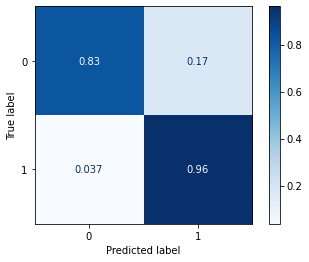

In [49]:
dtc_cm = confusion_matrix(y_test, dtc_y_predictor)
print()# Print a new line
plot_confusion_matrix(dtc_best_estimate,
                      X_test,
                      y_test,
                      cmap=plt.cm.Blues,
                      normalize='true' )

print(classification_report(y_test, dtc_y_predictor))
